# <span style="color:#FF00FF">Расчёты для главы 2 диплома - плоско-параллельного движения</span> 

![-](img/11.jpg)

### <span style="color:#00FFFF">Основные переменные</span> 

In [30]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import seaborn as sns
from sympy import *
from p_tqdm import p_map
import pandas as pd

Radius_orbit=6800000.0
mu=398576057600000.06
w_hkw = np.sqrt(mu / (Radius_orbit ** 3))

In [134]:
Rp_x, Rp_z, Vp_x, Vp_z, wp_y, m, M, J_y, Jp_y = var('Rp_x Rp_z Vp_x Vp_z wp_y m M J_y Jp_y', real=True, constant=True)
x_0, z_0, x_c, z_c, xp_c, zp_c, w_0, phi_0 = var('x_0 z_0 x_c z_c xp_c zp_c w_0 phi_0', real=True, constant=True)
Rc_x, Rc_z, R_x_0, R_z_0, r_x_0, r_z_0, r1_x, r1_z, T = var('Rc_x Rc_z R_x_0 R_z_0 r_x_0 r_z_0 r1_x r1_z T', real=True, constant=True)

v0_x, v0_z, t, w_y = var('v0_x v0_z t w_y', real=True)
R_x, R_z, V_x, V_z, r_x, r_z, v_x, v_z, phi = symbols("R_x R_z V_x V_z r_x r_z v_x v_z phi", cls=Function)

v_x_0 = v0_x*cos(phi_0) - v0_z*sin(phi_0) + Vp_x + wp_y * (sin(phi_0)*(x_0 - xp_c) + cos(phi_0)*(z_0 - zp_c))
v_z_0 = v0_x*sin(phi_0) + v0_z*cos(phi_0) + Vp_z - wp_y * (cos(phi_0)*(x_0 - xp_c) - sin(phi_0)*(z_0 - zp_c))
V_x_0 = -v0_x*m/M*cos(phi_0) + v0_z*m/M*sin(phi_0) + Vp_x + wp_y * (sin(phi_0)*(x_c - xp_c) + cos(phi_0)*(z_c - zp_c))
V_z_0 = -v0_x*m/M*sin(phi_0) - v0_z*m/M*cos(phi_0) - Vp_z + wp_y * (cos(phi_0)*(x_c - xp_c) - sin(phi_0)*(z_c - zp_c))
w_y = ((m+M)*(Rp_z*Vp_x - Rp_x*Vp_z) + Jp_y * wp_y - M*(R_z_0*V_x_0 - R_x_0*V_z_0) - m*(r_z_0*v_x_0 - r_x_0*v_z_0))/J_y

R_z_anw = (2*M*(2*R_z_0*w_0 + Vp_x + wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - 2*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)) - (M*(Vp_z - wp_y*(x_c*cos(phi_0) - xp_c*cos(phi_0) - z_c*sin(phi_0) + zp_c*sin(phi_0))) + m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)))*sin(t*w_0) - (M*(3*R_z_0*w_0 + 2*Vp_x + 2*wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - 2*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)))*cos(t*w_0))/(M*w_0)
r_x_anw = (-2*Vp_z + r_x_0*w_0 - 3*t*w_0*(Vp_x + 2*r_z_0*w_0 + v0_x*cos(phi_0) - v0_z*sin(phi_0) + wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0))) - 2*v0_x*sin(phi_0) - 2*v0_z*cos(phi_0) + 2*wp_y*(x_0*cos(phi_0) - xp_c*cos(phi_0) - z_0*sin(phi_0) + zp_c*sin(phi_0)) + 2*(Vp_z + v0_x*sin(phi_0) + v0_z*cos(phi_0) - wp_y*(x_0*cos(phi_0) - xp_c*cos(phi_0) - z_0*sin(phi_0) + zp_c*sin(phi_0)))*cos(t*w_0) + 2*(2*Vp_x + 3*r_z_0*w_0 + 2*v0_x*cos(phi_0) - 2*v0_z*sin(phi_0) + 2*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)))*sin(t*w_0))/w_0
v_x_anw = -3*Vp_x - 6*r_z_0*w_0 - 3*v0_x*cos(phi_0) + 3*v0_z*sin(phi_0) - 3*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)) - 2*(Vp_z + v0_x*sin(phi_0) + v0_z*cos(phi_0) - wp_y*(x_0*cos(phi_0) - xp_c*cos(phi_0) - z_0*sin(phi_0) + zp_c*sin(phi_0)))*sin(t*w_0) + 2*(2*Vp_x + 3*r_z_0*w_0 + 2*v0_x*cos(phi_0) - 2*v0_z*sin(phi_0) + 2*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)))*cos(t*w_0)
v_z_anw = (Vp_z + v0_x*sin(phi_0) + v0_z*cos(phi_0) - wp_y*(x_0*cos(phi_0) - xp_c*cos(phi_0) - z_0*sin(phi_0) + zp_c*sin(phi_0)))*cos(t*w_0) + (2*Vp_x + 3*r_z_0*w_0 + 2*v0_x*cos(phi_0) - 2*v0_z*sin(phi_0) + 2*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)))*sin(t*w_0)
r_z_anw = (2*Vp_x + 4*r_z_0*w_0 + 2*v0_x*cos(phi_0) - 2*v0_z*sin(phi_0) + 2*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)) + (Vp_z + v0_x*sin(phi_0) + v0_z*cos(phi_0) - wp_y*(x_0*cos(phi_0) - xp_c*cos(phi_0) - z_0*sin(phi_0) + zp_c*sin(phi_0)))*sin(t*w_0) - (2*Vp_x + 3*r_z_0*w_0 + 2*v0_x*cos(phi_0) - 2*v0_z*sin(phi_0) + 2*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)))*cos(t*w_0))/w_0
R_x_anw = (M*(R_x_0*w_0 + 2*Vp_z - 2*wp_y*(x_c*cos(phi_0) - xp_c*cos(phi_0) - z_c*sin(phi_0) + zp_c*sin(phi_0))) + 2*m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)) - 3*t*w_0*(M*(2*R_z_0*w_0 + Vp_x + wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - m*(v0_x*cos(phi_0) - v0_z*sin(phi_0))) - 2*(M*(Vp_z - wp_y*(x_c*cos(phi_0) - xp_c*cos(phi_0) - z_c*sin(phi_0) + zp_c*sin(phi_0))) + m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)))*cos(t*w_0) + 2*(M*(3*R_z_0*w_0 + 2*Vp_x + 2*wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - 2*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)))*sin(t*w_0))/(M*w_0)
V_z_anw = (-(M*(Vp_z - wp_y*(x_c*cos(phi_0) - xp_c*cos(phi_0) - z_c*sin(phi_0) + zp_c*sin(phi_0))) + m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)))*cos(t*w_0) + (M*(3*R_z_0*w_0 + 2*Vp_x + 2*wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - 2*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)))*sin(t*w_0))/M
V_x_anw = (-3*M*(2*R_z_0*w_0 + Vp_x + wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) + 3*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)) + 2*(M*(Vp_z - wp_y*(x_c*cos(phi_0) - xp_c*cos(phi_0) - z_c*sin(phi_0) + zp_c*sin(phi_0))) + m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)))*sin(t*w_0) + 2*(M*(3*R_z_0*w_0 + 2*Vp_x + 2*wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - 2*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)))*cos(t*w_0))/M
phi_anw = (J_y*phi_0 + t*(Jp_y*wp_y - M*(R_x_0*(Vp_z - wp_y*x_c*cos(phi_0) + wp_y*xp_c*cos(phi_0) + wp_y*z_c*sin(phi_0) - wp_y*zp_c*sin(phi_0)) + R_z_0*(Vp_x + wp_y*x_c*sin(phi_0) - wp_y*xp_c*sin(phi_0) + wp_y*z_c*cos(phi_0) - wp_y*zp_c*cos(phi_0)) + Rp_x*Vp_z - Rp_z*Vp_x) - R_x_0*m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)) + R_z_0*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)) - Rp_x*Vp_z*m + Rp_z*Vp_x*m - Vp_x*m*r_z_0 + Vp_z*m*r_x_0 + m*(r_x_0*(v0_x*sin(phi_0) + v0_z*cos(phi_0) - wp_y*x_0*cos(phi_0) + wp_y*xp_c*cos(phi_0) + wp_y*z_0*sin(phi_0) - wp_y*zp_c*sin(phi_0)) - r_z_0*(v0_x*cos(phi_0) - v0_z*sin(phi_0) + wp_y*x_0*sin(phi_0) - wp_y*xp_c*sin(phi_0) + wp_y*z_0*cos(phi_0) - wp_y*zp_c*cos(phi_0)))))/J_y

rg1 =  cos(phi_anw)*(r_x_anw - R_x_anw) + sin(phi_anw)*(r_z_anw - R_z_anw)
rg2 = -sin(phi_anw)*(r_x_anw - R_x_anw) + cos(phi_anw)*(r_z_anw - R_z_anw)
dis_symb = ((rg1-r1_x)**2 + (rg2-r1_z)**2)

a1symb = (-3*t*w_0*cos(phi_0) + 2*sin(phi_0)*cos(t*w_0) - 2*sin(phi_0) + 4*sin(t*w_0)*cos(phi_0))/w_0 - (3*m*t*w_0*cos(phi_0) - 2*m*sin(phi_0)*cos(t*w_0) + 2*m*sin(phi_0) - 4*m*sin(t*w_0)*cos(phi_0))/(M*w_0)
a2symb = (3*t*w_0*sin(phi_0) - 4*sin(phi_0)*sin(t*w_0) + 2*cos(phi_0)*cos(t*w_0) - 2*cos(phi_0))/w_0 - (-3*m*t*w_0*sin(phi_0) + 4*m*sin(phi_0)*sin(t*w_0) - 2*m*cos(phi_0)*cos(t*w_0) + 2*m*cos(phi_0))/(M*w_0)
a3symb = (-R_x_0*w_0 + 6*R_z_0*t*w_0**2 - 6*R_z_0*w_0*sin(t*w_0) + 4*Vp_z*cos(t*w_0) - 4*Vp_z + r_x_0*w_0 - 6*r_z_0*t*w_0**2 + 6*r_z_0*w_0*sin(t*w_0) - 3*t*w_0*wp_y*x_0*sin(phi_0) + 3*t*w_0*wp_y*x_c*sin(phi_0) - 3*t*w_0*wp_y*z_0*cos(phi_0) + 3*t*w_0*wp_y*z_c*cos(phi_0) + 4*wp_y*x_0*sin(phi_0)*sin(t*w_0) - 2*wp_y*x_0*cos(phi_0)*cos(t*w_0) + 2*wp_y*x_0*cos(phi_0) - 4*wp_y*x_c*sin(phi_0)*sin(t*w_0) - 2*wp_y*x_c*cos(phi_0)*cos(t*w_0) + 2*wp_y*x_c*cos(phi_0) + 4*wp_y*xp_c*cos(phi_0)*cos(t*w_0) - 4*wp_y*xp_c*cos(phi_0) + 2*wp_y*z_0*sin(phi_0)*cos(t*w_0) - 2*wp_y*z_0*sin(phi_0) + 4*wp_y*z_0*sin(t*w_0)*cos(phi_0) + 2*wp_y*z_c*sin(phi_0)*cos(t*w_0) - 2*wp_y*z_c*sin(phi_0) - 4*wp_y*z_c*sin(t*w_0)*cos(phi_0) - 4*wp_y*zp_c*sin(phi_0)*cos(t*w_0) + 4*wp_y*zp_c*sin(phi_0))/w_0
a4symb = -(sin(phi_0)*sin(t*w_0) - 2*cos(phi_0)*cos(t*w_0) + 2*cos(phi_0))/w_0 + (-m*sin(phi_0)*sin(t*w_0) + 2*m*cos(phi_0)*cos(t*w_0) - 2*m*cos(phi_0))/(M*w_0)
a5symb = -(2*sin(phi_0)*cos(t*w_0) - 2*sin(phi_0) + sin(t*w_0)*cos(phi_0))/w_0 + (-2*m*sin(phi_0)*cos(t*w_0) + 2*m*sin(phi_0) - m*sin(t*w_0)*cos(phi_0))/(M*w_0)
a6symb = (-3*R_z_0*w_0*cos(t*w_0) + 4*R_z_0*w_0 - 2*Vp_z*sin(t*w_0) + 3*r_z_0*w_0*cos(t*w_0) - 4*r_z_0*w_0 + 2*wp_y*x_0*sin(phi_0)*cos(t*w_0) - 2*wp_y*x_0*sin(phi_0) + wp_y*x_0*sin(t*w_0)*cos(phi_0) - 2*wp_y*x_c*sin(phi_0)*cos(t*w_0) + 2*wp_y*x_c*sin(phi_0) + wp_y*x_c*sin(t*w_0)*cos(phi_0) - 2*wp_y*xp_c*sin(t*w_0)*cos(phi_0) - wp_y*z_0*sin(phi_0)*sin(t*w_0) + 2*wp_y*z_0*cos(phi_0)*cos(t*w_0) - 2*wp_y*z_0*cos(phi_0) - wp_y*z_c*sin(phi_0)*sin(t*w_0) - 2*wp_y*z_c*cos(phi_0)*cos(t*w_0) + 2*wp_y*z_c*cos(phi_0) + 2*wp_y*zp_c*sin(phi_0)*sin(t*w_0))/w_0

b1symb = t*(-R_x_0*m*sin(phi_0) + R_z_0*m*cos(phi_0) + m*(r_x_0*sin(phi_0) - r_z_0*cos(phi_0)))/J_y
b2symb = t*(-R_x_0*m*cos(phi_0) - R_z_0*m*sin(phi_0) + m*(r_x_0*cos(phi_0) + r_z_0*sin(phi_0)))/J_y
b3symb = (J_y*phi_0 + Jp_y*t*wp_y - M*R_x_0*Vp_z*t + M*R_x_0*t*wp_y*x_c*cos(phi_0) - M*R_x_0*t*wp_y*xp_c*cos(phi_0) - M*R_x_0*t*wp_y*z_c*sin(phi_0) + M*R_x_0*t*wp_y*zp_c*sin(phi_0) - M*R_z_0*Vp_x*t - M*R_z_0*t*wp_y*x_c*sin(phi_0) + M*R_z_0*t*wp_y*xp_c*sin(phi_0) - M*R_z_0*t*wp_y*z_c*cos(phi_0) + M*R_z_0*t*wp_y*zp_c*cos(phi_0) - M*Rp_x*Vp_z*t + M*Rp_z*Vp_x*t - Rp_x*Vp_z*m*t + Rp_z*Vp_x*m*t - Vp_x*m*r_z_0*t + Vp_z*m*r_x_0*t - m*r_x_0*t*wp_y*x_0*cos(phi_0) + m*r_x_0*t*wp_y*xp_c*cos(phi_0) + m*r_x_0*t*wp_y*z_0*sin(phi_0) - m*r_x_0*t*wp_y*zp_c*sin(phi_0) - m*r_z_0*t*wp_y*x_0*sin(phi_0) + m*r_z_0*t*wp_y*xp_c*sin(phi_0) - m*r_z_0*t*wp_y*z_0*cos(phi_0) + m*r_z_0*t*wp_y*zp_c*cos(phi_0))/J_y

c1symb = -r1_x
c2symb = -r1_z

a1, a2, a3, a4, a5, a6, c1, c2, b1, b2, b3 = var('a1 a2 a3 a4 a5 a6 c1 c2 b1 b2 b3', real=True)
A1 = a1 * v0_x + a2 * v0_z + a3
A2 = a4 * v0_x + a5 * v0_z + a6
A = (a1+a4) * v0_x + (a2+a5) * v0_z + a3+a6
A_ = (a1-a4) * v0_x + (a2-a5) * v0_z + a3-a6
B = b1 * v0_x + b2 * v0_z + b3

rg1_near_sin_symb = ((2*Vp_x + 4*r_z_0*w_0 + 2*v0_x*cos(phi_0) - 2*v0_z*sin(phi_0) + 2*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)) + 
                    (Vp_z + v0_x*sin(phi_0) + v0_z*cos(phi_0) - wp_y*(x_0*cos(phi_0) - xp_c*cos(phi_0) - z_0*sin(phi_0) + zp_c*sin(phi_0)))*sin(t*w_0) - 
                    (2*Vp_x + 3*r_z_0*w_0 + 2*v0_x*cos(phi_0) - 2*v0_z*sin(phi_0) + 2*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)))*cos(t*w_0))/w_0 - 
                    (2*M*(2*R_z_0*w_0 + Vp_x + wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - 2*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)) - 
                    (M*(Vp_z - wp_y*(x_c*cos(phi_0) - xp_c*cos(phi_0) - z_c*sin(phi_0) + zp_c*sin(phi_0))) + m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)))*sin(t*w_0) - 
                    (M*(3*R_z_0*w_0 + 2*Vp_x + 2*wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) -
                    2*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)))*cos(t*w_0))/(M*w_0))
rg1_in_sin_symb = ((J_y*phi_0 + t*(Jp_y*wp_y - M*(R_x_0*(Vp_z - wp_y*x_c*cos(phi_0) + wp_y*xp_c*cos(phi_0) + wp_y*z_c*sin(phi_0) - wp_y*zp_c*sin(phi_0)) + 
                                                  R_z_0*(Vp_x + wp_y*x_c*sin(phi_0) - wp_y*xp_c*sin(phi_0) + wp_y*z_c*cos(phi_0) - wp_y*zp_c*cos(phi_0)) + 
                    Rp_x*Vp_z - Rp_z*Vp_x) - R_x_0*m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)) + R_z_0*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)) - Rp_x*Vp_z*m + Rp_z*Vp_x*m - 
                    Vp_x*m*r_z_0 + Vp_z*m*r_x_0 + m*(r_x_0*(v0_x*sin(phi_0) + v0_z*cos(phi_0) - wp_y*x_0*cos(phi_0) + wp_y*xp_c*cos(phi_0) + wp_y*z_0*sin(phi_0) - wp_y*zp_c*sin(phi_0)) - 
                    r_z_0*(v0_x*cos(phi_0) - v0_z*sin(phi_0) + wp_y*x_0*sin(phi_0) - wp_y*xp_c*sin(phi_0) + wp_y*z_0*cos(phi_0) - wp_y*zp_c*cos(phi_0)))))/J_y)
rg1_near_cos_symb = ((-2*Vp_z + r_x_0*w_0 - 3*t*w_0*(Vp_x + 2*r_z_0*w_0 + v0_x*cos(phi_0) - v0_z*sin(phi_0) + wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0))) - 
                      2*v0_x*sin(phi_0) - 2*v0_z*cos(phi_0) + 2*wp_y*(x_0*cos(phi_0) - xp_c*cos(phi_0) - z_0*sin(phi_0) + zp_c*sin(phi_0)) + 
                    (2*Vp_z + 2*v0_x*sin(phi_0) + 2*v0_z*cos(phi_0) - 2*wp_y*(x_0*cos(phi_0) - xp_c*cos(phi_0) - z_0*sin(phi_0) + zp_c*sin(phi_0)))*cos(t*w_0) + 
                    (4*Vp_x + 6*r_z_0*w_0 + 4*v0_x*cos(phi_0) - 4*v0_z*sin(phi_0) + 4*wp_y*(x_0*sin(phi_0) - xp_c*sin(phi_0) + z_0*cos(phi_0) - zp_c*cos(phi_0)))*sin(t*w_0))/w_0 - 
                    (M*(R_x_0*w_0 + 2*Vp_z - 2*wp_y*(x_c*cos(phi_0) - xp_c*cos(phi_0) - z_c*sin(phi_0) + zp_c*sin(phi_0))) + 2*m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)) - 
                    3*t*w_0*(M*(2*R_z_0*w_0 + Vp_x + wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - m*(v0_x*cos(phi_0) - v0_z*sin(phi_0))) - 
                    (2*M*(Vp_z - wp_y*(x_c*cos(phi_0) - xp_c*cos(phi_0) - z_c*sin(phi_0) + zp_c*sin(phi_0))) + 2*m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)))*cos(t*w_0) + 
                    (2*M*(3*R_z_0*w_0 + 2*Vp_x + 2*wp_y*(x_c*sin(phi_0) - xp_c*sin(phi_0) + z_c*cos(phi_0) - zp_c*cos(phi_0))) - 4*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)))*sin(t*w_0))/
                    (M*w_0))
rg1_in_cos_symb = ((J_y*phi_0 + t*(Jp_y*wp_y - M*(R_x_0*(Vp_z - wp_y*x_c*cos(phi_0) + wp_y*xp_c*cos(phi_0) + wp_y*z_c*sin(phi_0) - wp_y*zp_c*sin(phi_0)) + 
                                                  R_z_0*(Vp_x + wp_y*x_c*sin(phi_0) - wp_y*xp_c*sin(phi_0) + wp_y*z_c*cos(phi_0) - wp_y*zp_c*cos(phi_0)) + Rp_x*Vp_z - Rp_z*Vp_x) - 
                    R_x_0*m*(v0_x*sin(phi_0) + v0_z*cos(phi_0)) + R_z_0*m*(v0_x*cos(phi_0) - v0_z*sin(phi_0)) - Rp_x*Vp_z*m + Rp_z*Vp_x*m - Vp_x*m*r_z_0 + Vp_z*m*r_x_0 + 
                    m*(r_x_0*(v0_x*sin(phi_0) + v0_z*cos(phi_0) - wp_y*x_0*cos(phi_0) + wp_y*xp_c*cos(phi_0) + wp_y*z_0*sin(phi_0) - wp_y*zp_c*sin(phi_0)) - 
                      r_z_0*(v0_x*cos(phi_0) - v0_z*sin(phi_0) + wp_y*x_0*sin(phi_0) - wp_y*xp_c*sin(phi_0) + wp_y*z_0*cos(phi_0) - wp_y*zp_c*cos(phi_0)))))/J_y)

### <span style="color:#00FFFF">Подбор приближения с коэффициентами $c_i$</span> 

In [150]:
dx = A1*cos(B) - A2*sin(B) + c1
dz = A1*sin(B) + A2*cos(B) + c2
tmp = (A1*cos(B) + A2/A1*(A2*cos(B) + c2) + c1).simplify()
tmp

((c1 + (a1*v0_x + a2*v0_z + a3)*cos(b1*v0_x + b2*v0_z + b3))*(a1*v0_x + a2*v0_z + a3) + (c2 + (a4*v0_x + a5*v0_z + a6)*cos(b1*v0_x + b2*v0_z + b3))*(a4*v0_x + a5*v0_z + a6))/(a1*v0_x + a2*v0_z + a3)

In [155]:
# Иначе сформулированная транцендентная задача
dx_ = A1 + c1*cos(B) + c2*sin(B)
dz_ = A2 - c1*sin(B) + c2*cos(B)
A2 + c1/c2*A1 + c1**2/c2*cos(B) + c2*cos(B)

a4*v0_x + a5*v0_z + a6 + c1**2*cos(b1*v0_x + b2*v0_z + b3)/c2 + c1*(a1*v0_x + a2*v0_z + a3)/c2 + c2*cos(b1*v0_x + b2*v0_z + b3)

### <span style="color:#00FFFF">Отрисовка пары картинок</span> 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


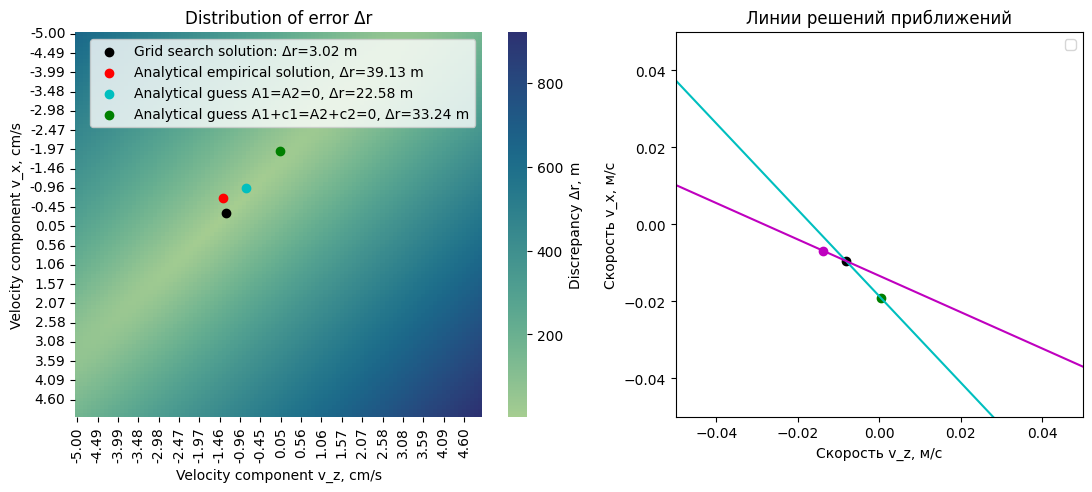

In [200]:
r_spread = 20
T_max = 3000
v_max_repulsion = 0.05
m_real = 20
M_real = 650
J_y_real = 5500
J_p_y_real = 5600

N_heatmap = 100
rate = 5

def empirical_solution(a_1, a_2, a_3, a_4, a_5, a_6, b_1, b_2, b_3, c_1, c_2):
    return (a_2*a_6 - a_3*a_5 + a_5*np.sqrt(2*c_1**2+2*c_2**2)) / (a_1*a_5 - a_2*a_4), \
           (a_3*a_4 - a_1*a_6 - a_4*np.sqrt(2*c_1**2+2*c_2**2)) / (a_1*a_5 - a_2*a_4)

def init_params(r_spread, T_max, v_max_repulsion, m_real=20, M_real=650, J_p_y_real=5600, J_y_real: float = 5500):
    Vp_x_rand =  random.uniform(-0.001,  0.001)
    Vp_z_rand =  random.uniform(-0.001,  0.001)
    Rp_x_rand =  random.uniform(-r_spread,     r_spread)
    Rp_z_rand =  random.uniform(-r_spread,     r_spread)
    Rc_x_rand =  Rp_x_rand + random.uniform(-1, 1)
    Rc_z_rand =  Rp_z_rand + random.uniform(-1, 1)
    Rx_0_rand =  random.uniform(-r_spread,     r_spread)
    Rz_0_rand =  random.uniform(-r_spread,     r_spread)
    xp_c_rand =  random.uniform(-5,      5)
    zp_c_rand =  random.uniform(-5,      5)
    x_c_rand =   xp_c_rand + random.uniform(-1, 1)
    z_c_rand =   zp_c_rand + random.uniform(-1, 1)
    dr_c_x_rand = random.uniform(-1, 1)
    dr_c_z_rand = random.uniform(-1, 1)
    r_x_0_rand = random.uniform(-r_spread,     r_spread)
    r_z_0_rand = random.uniform(-r_spread,     r_spread)
    r1_x_rand =  random.uniform(-r_spread,     r_spread)
    r1_z_rand =  random.uniform(-r_spread,     r_spread)
    x_0_rand =   random.uniform(-r_spread,     r_spread)
    z_0_rand =   random.uniform(-r_spread,     r_spread)
    phi_0_rand = random.uniform(-0.5,    -0.5)
    wp_y_rand =  random.uniform(-0.0001, 0.0001)
    dr_c_x, dr_c_z = var("dr_c_x dr_c_z", real=True)
    w_after = 1/Jp_y*(M*(R_z_anw*V_x_anw-R_x_anw*V_z_anw) + m*(r_z_anw*v_x_anw-r_x_anw*v_z_anw) + J_y*w_y - 
        (m*v_z_anw + M*V_z_anw) * (R_x_anw + dr_c_x) + (m * v_x_anw + M * V_x_anw) * (R_z_anw + dr_c_z))
    rand_params = [(Vp_x, Vp_x_rand), (Vp_z, Vp_z_rand), (Rp_x, Rp_x_rand), (Rp_z, Rp_z_rand), (r_x_0, r_x_0_rand), (r_z_0, r_z_0_rand),
                    (phi_0, phi_0_rand), (wp_y, wp_y_rand), (xp_c, xp_c_rand), (zp_c, zp_c_rand), (x_c, x_c_rand), (z_c, z_c_rand), (w_0, w_hkw),
                    (Rc_x, Rc_x_rand), (Rc_z, Rc_z_rand), (x_0, x_0_rand), (z_0, z_0_rand), (J_y, J_y_real), (Jp_y, J_p_y_real), 
                    (R_x_0, Rx_0_rand), (R_z_0, Rz_0_rand), (m, m_real), (M, M_real)]

    r_f_x = rg1.subs(rand_params)
    r_f_z = rg2.subs(rand_params)
    w_y_real = w_y.subs(rand_params)
    rg1_near_sin = rg1_near_sin_symb.subs(rand_params + [(t, T_max)])
    rg1_in_sin = rg1_in_sin_symb.subs(rand_params + [(t, T_max)])
    rg1_near_cos = rg1_near_cos_symb.subs(rand_params + [(t, T_max)])
    rg1_in_cos = rg1_in_cos_symb.subs(rand_params + [(t, T_max)])

    dis_x = r_f_x-r1_x_rand
    dis_z = r_f_z-r1_z_rand
    dis = ((dis_x)**2 + (dis_z)**2)
    d_x = dis_x.subs(t, T_max)  
    d_z = dis_z.subs(t, T_max)  
    discrepansy = (d_x)**2 + (d_z)**2 
    func_d = lambdify([v0_x, v0_z], discrepansy)
    func_w = lambdify([v0_x, v0_z], w_y_real)
    a_1 = float(rg1_near_cos.diff(v0_x))
    a_2 = float(rg1_near_cos.diff(v0_z))
    a_3 = float(rg1_near_cos - a_1 * v0_x - a_2 * v0_z)
    a_4 = float(rg1_near_sin.diff(v0_x))
    a_5 = float(rg1_near_sin.diff(v0_z))
    a_6 = float(rg1_near_sin - a_4 * v0_x - a_5 * v0_z)
    b_1 = -float(rg1_in_cos.diff(v0_x))
    b_2 = -float(rg1_in_cos.diff(v0_z))
    b_3 = -float(rg1_in_cos + b_1 * v0_x + b_2 * v0_z)
    c_1 = -r1_x_rand
    c_2 = -r1_z_rand

    params = (Vp_x_rand, Vp_z_rand, Rp_x_rand, Rp_z_rand, Rc_x_rand, Rc_z_rand, Rx_0_rand, Rz_0_rand, xp_c_rand, zp_c_rand, x_c_rand, z_c_rand, dr_c_x_rand, dr_c_z_rand,
              r_x_0_rand, r_z_0_rand, r1_x_rand, r1_z_rand, x_0_rand, z_0_rand, phi_0_rand, wp_y_rand, a_1, a_2, a_3, a_4, a_5, a_6, b_1, b_2, b_3, c_1, c_2)
    return d_x, d_z, discrepansy, func_d, func_w, params
d_x, d_z, discrepansy, func_d, func_w, params = init_params(r_spread, T_max, v_max_repulsion, m_real, M_real, J_p_y_real, J_y_real)
Vp_x_rand, Vp_z_rand, Rp_x_rand, Rp_z_rand, Rc_x_rand, Rc_z_rand, Rx_0_rand, Rz_0_rand, xp_c_rand, zp_c_rand, x_c_rand, z_c_rand, dr_c_x_rand, dr_c_z_rand, r_x_0_rand, r_z_0_rand, r1_x_rand, r1_z_rand, x_0_rand, z_0_rand, phi_0_rand, wp_y_rand, a_1, a_2, a_3, a_4, a_5, a_6, b_1, b_2, b_3, c_1, c_2 = params
def draw_pair_plot(r_spread, T_max, v_max_repulsion, m_real=20, M_real=650, J_p_y_real=5600, J_y_real: float = 5500):
  eq_tmp = Eq((c2- c1)**2, A*(c1 + c2 + A))
  eq_v0x = solve(eq_tmp, v0_x)
  v_x_C1_0 = - 2 * r_z_0_rand * w_hkw
  x_zeroA = (a_2*a_6 - a_3*a_5) / (a_1*a_5 - a_2*a_4)
  z_zeroA = (a_3*a_4 - a_1*a_6) / (a_1*a_5 - a_2*a_4)
  x_zeroAc = (a_2*(a_6+c_2) - a_5*(a_3+c_1)) / (a_1*a_5 - a_2*a_4)
  z_zeroAc = (a_4*(a_3+c_1) - a_1*(a_6+c_2)) / (a_1*a_5 - a_2*a_4)
  x_empirical, z_empirical = empirical_solution(a_1, a_2, a_3, a_4, a_5, a_6, b_1, b_2, b_3, c_1, c_2)

  N_tmp = 10
  x_tmp = np.linspace(-v_max_repulsion, v_max_repulsion, N_tmp)

  y_zeroA1 = [(-a_2 * i - a_3) / a_1 for i in x_tmp]
  y_zeroA2 = [(-a_5 * i - a_6) / a_4 for i in x_tmp]



  anw = [[[0. for _ in range(N_heatmap)] for _ in range(N_heatmap)] for _ in range(2)]
  v_x_list = np.linspace(-v_max_repulsion, v_max_repulsion, N_heatmap)
  v_z_list = np.linspace(-v_max_repulsion, v_max_repulsion, N_heatmap)
  xlabels_0 = ['{:4.2f}'.format(x*100) for x in v_z_list]
  ylabels_0 = ['{:4.2f}'.format(y*100) for y in v_x_list]

  min_tmp_large = 1e20
  x_min = 0
  z_min = 0
  for i in range(N_heatmap):
      for j in range(N_heatmap):
          tmp = np.sqrt(func_d(v_x_list[i], v_z_list[j]))
          if tmp < min_tmp_large:
              min_tmp_large = tmp
              x_min = i
              z_min = j
          anw[0][i][j] = tmp

  fig, axes = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'width_ratios': [10, 8]})
  ax = sns.heatmap(anw[0], ax=axes[0], cmap="crest", xticklabels=xlabels_0, yticklabels=ylabels_0, cbar_kws={'label': 'Discrepancy Δr, m'})
  ax.set_xticks(ax.get_xticks()[::rate])
  ax.set_xticklabels(xlabels_0[::rate])
  ax.set_yticks(ax.get_yticks()[::rate])
  ax.set_yticklabels(ylabels_0[::rate])
  axes[0].set_title("Distribution of error Δr")
  axes[1].set_title("Линии решений приближений")
  axes[0].set_xlabel(f"Velocity component v_z, cm/s")
  axes[0].set_ylabel(f"Velocity component v_x, cm/s")
  axes[0].scatter(z_min, x_min, c='k', label=f'Grid search solution: Δr={np.sqrt(func_d(v_x_list[x_min], v_z_list[z_min])):.{2}f} m')

  kk = N_heatmap / (2 * v_max_repulsion)
  bb = v_max_repulsion
  axes[0].scatter((z_empirical + bb) * kk, (x_empirical + bb) * kk, c='r',  label=f'Analytical empirical solution, Δr={np.sqrt(func_d(v_x_list[int((x_empirical + bb) * kk)], v_z_list[int((z_empirical + bb) * kk)])):.{2}f} m')
  axes[0].scatter((z_zeroA + bb) * kk, (x_zeroA + bb) * kk, c='c',  label=f'Analytical guess A1=A2=0, Δr={np.sqrt(func_d(v_x_list[int((x_zeroA + bb) * kk)], v_z_list[int((z_zeroA + bb) * kk)])):.{2}f} m')
  axes[0].scatter((z_zeroAc + bb) * kk, (x_zeroAc + bb) * kk, c='g',  label=f'Analytical guess A1+c1=A2+c2=0, Δr={np.sqrt(func_d(v_x_list[int((x_zeroAc + bb) * kk)], v_z_list[int((z_zeroAc + bb) * kk)])):.{2}f} m')
  

  axes[1].set_xlim([-v_max_repulsion, v_max_repulsion])
  axes[1].set_ylim([-v_max_repulsion, v_max_repulsion])
  axes[1].set_xlabel("Velocity component v_z, m/s")
  axes[1].set_ylabel("Velocity component v_x, m/s")
  axes[1].invert_yaxis()
  axes[0].legend()
  axes[1].legend()

  axes[1].plot(x_tmp, y_zeroA1, 'c', label='A1-решение')
  axes[1].plot(x_tmp, y_zeroA2, 'm', label='A2-решение')

  axes[1].scatter(z_zeroA, x_zeroA, c='k', label="A1=0, A2=0")
  axes[1].scatter(z_zeroAc, x_zeroAc, c='g', label="A1+c1=0, A2+c2=0")
  axes[1].scatter(z_empirical, x_empirical, c='m', label="empirical")

  axes[1].set_xlim([-v_max_repulsion, v_max_repulsion])
  axes[1].set_ylim([-v_max_repulsion, v_max_repulsion])
  axes[1].set_xlabel("Скорость v_z, м/c")
  axes[1].set_ylabel("Скорость v_x, м/c")

  plt.show()
draw_pair_plot(r_spread, T_max, v_max_repulsion, m_real, M_real, J_p_y_real, J_y_real)

### Приближение 2D

### ПРАВКИ
#### TURNs -> revolution(фу), orbital periods(best)
#### speed -> velocity

In [45]:
r_spread = 10
v_max_repulsion = 0.05

n_experiments = 100
# T_max_list = [200., 300., 400., 500., 600., 700., 800., 900., 1000., 2000., 3000., 4000., 5000.]
T_max_list = [250., 500., 750., 1000., 2000., 3000., 4000., 5000., 5500., 6000., 7000.]
# T_max_list = [5500.]

def praeter_pictura(T_max, f, r_spread, n_experiments):
    for _ in range(n_experiments):
        d_x, d_z, discrepansy, func_d, func_w, params = init_params(r_spread, T_max, v_max_repulsion, m_real, M_real, J_p_y_real, J_y_real)
        Vp_x_rand, Vp_z_rand, Rp_x_rand, Rp_z_rand, Rc_x_rand, Rc_z_rand, Rx_0_rand, Rz_0_rand, xp_c_rand, zp_c_rand, x_c_rand, z_c_rand, dr_c_x_rand, dr_c_z_rand, r_x_0_rand, r_z_0_rand, r1_x_rand, r1_z_rand, x_0_rand, z_0_rand, phi_0_rand, wp_y_rand, a_1, a_2, a_3, a_4, a_5, a_6, b_1, b_2, b_3, c_1, c_2 = params
        x_empirical = (a_2*a_6 - a_3*a_5 + a_5*np.sqrt(2*c_1**2+2*c_2**2)) / (a_1*a_5 - a_2*a_4)
        z_empirical = (a_3*a_4 - a_1*a_6 - a_4*np.sqrt(2*c_1**2+2*c_2**2)) / (a_1*a_5 - a_2*a_4)
        f.write(f"{r_spread} {T_max} {np.linalg.norm([x_empirical, 0, z_empirical])}\n")

f = open(f'storage/v_value_from_t_{r_spread}.txt', 'a')
p_map(praeter_pictura, T_max_list, [f for _ in range(len(T_max_list))], [r_spread for _ in range(len(T_max_list))], [n_experiments for _ in range(len(T_max_list))])
f.close()

  0%|          | 0/1 [00:00<?, ?it/s]

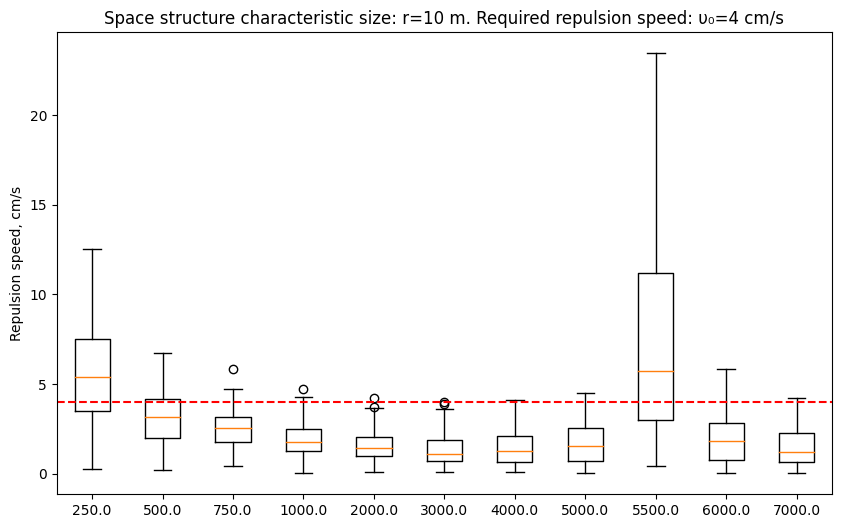

In [12]:
def draw_praeter_pictura(r_spread: int, reference: float):
    v_needed_spread = dict()
    f = open(f'storage/v_value_from_t_{r_spread}.txt', 'r')
    for line in f:
        lst = line.split()
        if len(lst) > 2:
            r = float(lst[0])
            T = float(lst[1])
            v = float(lst[2])
            if T in v_needed_spread.keys():
                v_needed_spread[T] += [v * 100]
            else:
                v_needed_spread[T] = [v * 100]
    f.close()
    fig = plt.figure(figsize=(10, 6))
    tmp = sorted(v_needed_spread.items())
    plt.boxplot([tmp[i][1] for i in range(len(tmp))], labels=[tmp[i][0] for i in range(len(tmp))])
    left, right = plt.xlim()
    plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
    plt.ylabel(f"Repulsion speed, cm/s")
    plt.title(f"Space structure characteristic size: r={r_spread} m. Required repulsion speed: υ₀={reference} cm/s")
    plt.show()

draw_praeter_pictura(r_spread=10, reference=4)

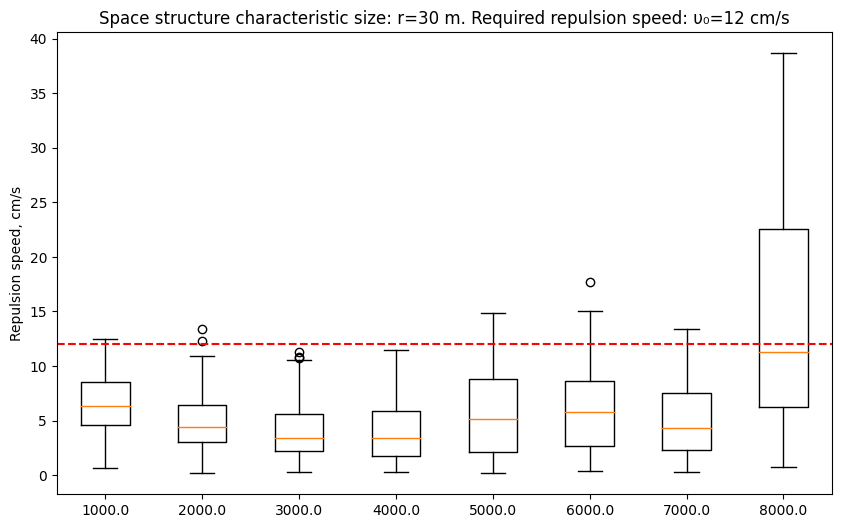

In [7]:
draw_praeter_pictura(r_spread=30, reference=12)

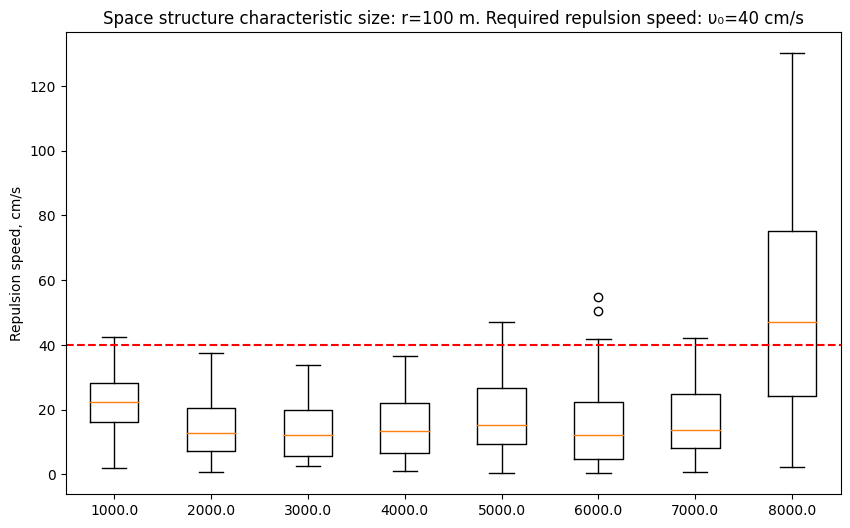

In [49]:
draw_praeter_pictura(r_spread=100, reference=40)

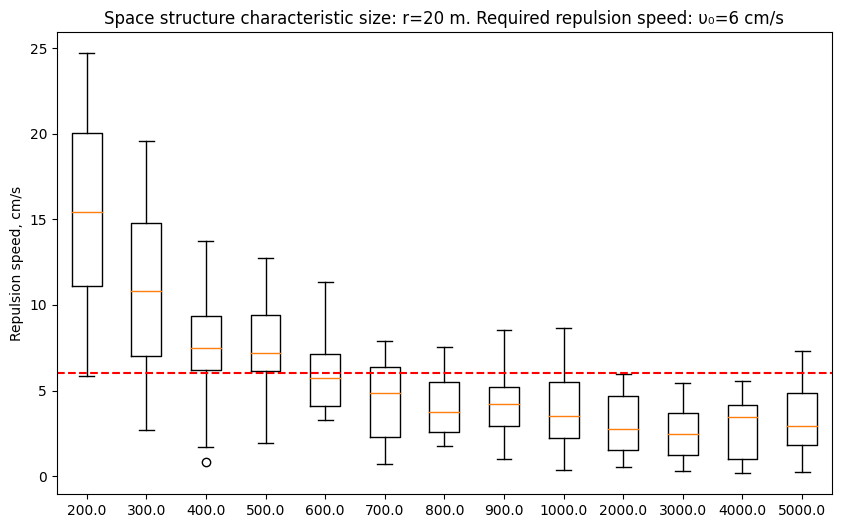

In [44]:
draw_praeter_pictura(r_spread=20, reference=6)

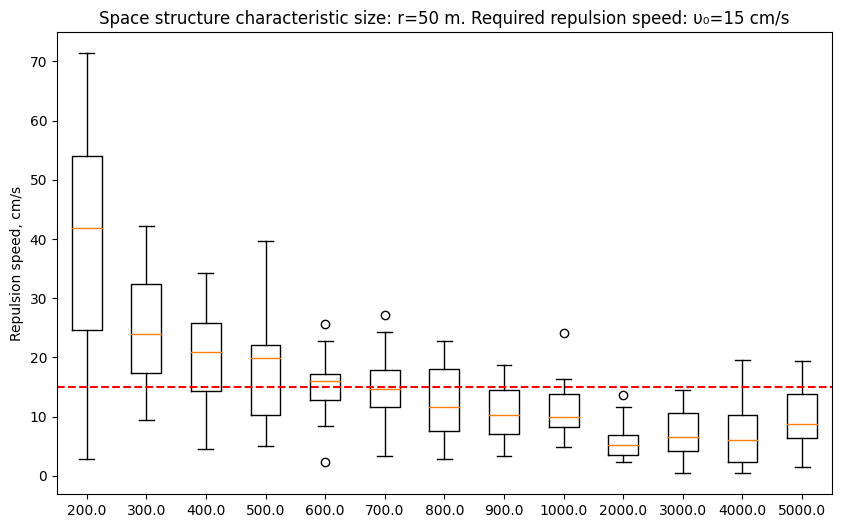

In [46]:
draw_praeter_pictura(r_spread=50, reference=15)

### <span style="color:#00FFFF">Начальные приближения: оценка скорости отталкивания</span> 

##### <span style="color:#7ff388">Расчёт</span> скоростей отталкивания плоско-параллельного и статического случаев

In [119]:
r_spread = 30
v_max_repulsion = 0.05

n_experiments = 100
T_max_list = [250., 500., 750., 1000., 2000., 3000., 4000., 5000., 5500., 6000., 7000.]

def get_v0(r0, r1, t):
    w = w_hkw
    x0, y0, z0 = r0
    x1, y1, z1 = r1
    den = -3 * t * w * np.sin(t * w) - 8 * np.cos(t * w) + 8
    num1 = w * (6 * t * w * z0 * np.sin(t * w) - x0 * np.sin(t * w) + x1 * np.sin(t * w) + 14 * z0 * np.cos(t * w) -
                14 * z0 - 2 * z1 * np.cos(t * w) + 2 * z1)
    num2 = w * (3 * t * w * z0 * np.cos(t * w) - 3 * t * w * z1 - 2 * x0 * np.cos(t * w) + 2 * x0 +
                2 * x1 * np.cos(t * w) - 2 * x1 - 4 * z0 * np.sin(t * w) + 4 * z1 * np.sin(t * w))
    return np.array([num1 / den,
                     w * (-y0 * np.cos(t * w) + y1)/np.sin(t * w),
                     num2 / den])

def praeter_hkw_pictura(T_max, f, r_spread, n_experiments):
    for _ in range(n_experiments):
        u = get_v0(r_spread * (2 * np.random.rand(3) - 1), r_spread * (2 * np.random.rand(3) - 1), T_max)
        f.write(f"{r_spread} {T_max} {np.linalg.norm(u)}\n")

def praeter_2d_pictura(T_max, f, r_spread, n_experiments):
    for _ in range(n_experiments):
        d_x, d_z, discrepansy, func_d, func_w, params = init_params(r_spread, T_max, v_max_repulsion, m_real, M_real, J_p_y_real, J_y_real)
        Vp_x_rand, Vp_z_rand, Rp_x_rand, Rp_z_rand, Rc_x_rand, Rc_z_rand, Rx_0_rand, Rz_0_rand, xp_c_rand, zp_c_rand, x_c_rand, z_c_rand, dr_c_x_rand, dr_c_z_rand, r_x_0_rand, r_z_0_rand, r1_x_rand, r1_z_rand, x_0_rand, z_0_rand, phi_0_rand, wp_y_rand, a_1, a_2, a_3, a_4, a_5, a_6, b_1, b_2, b_3, c_1, c_2 = params
        x_empirical = (a_2*a_6 - a_3*a_5 + a_5*np.sqrt(2*c_1**2+2*c_2**2)) / (a_1*a_5 - a_2*a_4)
        z_empirical = (a_3*a_4 - a_1*a_6 - a_4*np.sqrt(2*c_1**2+2*c_2**2)) / (a_1*a_5 - a_2*a_4)
        f.write(f"{r_spread} {T_max} {np.linalg.norm([x_empirical, 0, z_empirical])}\n")

def local_func_maker(func, name):
    f = open(f'storage/v_hkw_value_from_t_{r_spread}.txt', 'a')
    p_map(func, T_max_list, [f for _ in range(len(T_max_list))], 
                            [r_spread for _ in range(len(T_max_list))], 
                            [n_experiments for _ in range(len(T_max_list))])
    f.close()

local_func_maker(praeter_hkw_pictura, f'storage/v_hkw_value_from_t_{r_spread}.txt')
local_func_maker(praeter_2d_pictura, f'storage/v_value_from_t_{r_spread}.txt')

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

##### <span style="color:#7ff388">Чтение</span> файлов, сборка данных

In [121]:
def read_files_create_dataframe(r_spread):
    def local_func_reader(name: str):
        dictionary = dict()
        f = open(name, 'r')
        for line in f:
            lst = line.split()
            if len(lst) > 2:
                r = float(lst[0])
                T = float(lst[1])
                v = float(lst[2])
                if T in dictionary.keys():
                    dictionary[T] += [v * 100]
                else:
                    dictionary[T] = [v * 100]
        f.close()
        return sorted(dictionary.items())

    tmp_2d = local_func_reader(f'storage/v_value_from_t_{r_spread}.txt')
    tmp_hkw = local_func_reader(f'storage/v_hkw_value_from_t_{r_spread}.txt')

    df2 = pd.DataFrame(data={'V': {}, 'Guess': {}, 'Motion time, s': {}})
    for i in range(len(tmp_2d)):
        for j in range(len(tmp_2d[i][1])):
            df2 = df2.append({'V':tmp_hkw[i][1][j], 'Guess':'ω=0', 'Motion time, s':str(int(tmp_hkw[i][0]))}, ignore_index=True)
            df2 = df2.append({'V':tmp_2d[i][1][j], 'Guess':'ω=const>0', 'Motion time, s':str(int(tmp_2d[i][0]))}, ignore_index=True)
    return df2

r_spread = 10
df2 = read_files_create_dataframe(r_spread)

/tmp/ipykernel_290/1164897834.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'V':tmp_hkw[i][1][j], 'Guess':'ω=0', 'Motion time, s':str(int(tmp_hkw[i][0]))}, ignore_index=True)
/tmp/ipykernel_290/1164897834.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'V':tmp_2d[i][1][j], 'Guess':'ω=const>0', 'Motion time, s':str(int(tmp_2d[i][0]))}, ignore_index=True)
/tmp/ipykernel_290/1164897834.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'V':tmp_hkw[i][1][j], 'Guess':'ω=0', 'Motion time, s':str(int(tmp_hkw[i][0]))}, ignore_index=True)
/tmp/ipykernel_290/1164897834.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

##### <span style="color:#7ff388">Отображение</span> на одном графике

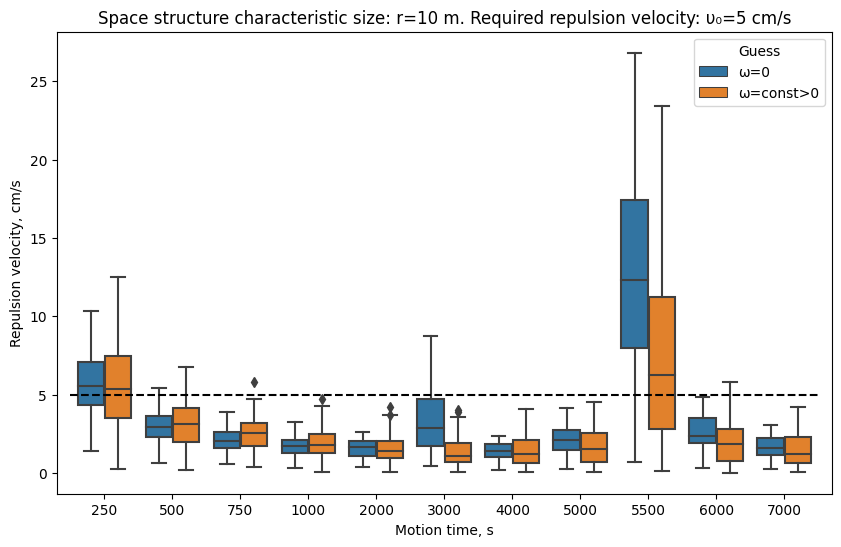

In [122]:
def draw_them_all_right_here(r_spread, reference):
    fig = plt.figure(figsize=(10, 6))
    sns.boxplot(data=df2, hue='Guess', x='Motion time, s', y='V')  
    left, right = plt.xlim()
    plt.hlines(reference, xmin=left, xmax=right, color='k', linestyles='--')
    plt.ylabel(f"Repulsion velocity, cm/s")
    plt.title(f"Space structure characteristic size: r={r_spread} m. Required repulsion velocity: υ₀={reference} cm/s")
    plt.show()

reference = 5
draw_them_all_right_here(r_spread, reference)

In [128]:
r_spread = 30
df2 = read_files_create_dataframe(r_spread)

/tmp/ipykernel_290/1164897834.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'V':tmp_hkw[i][1][j], 'Guess':'ω=0', 'Motion time, s':str(int(tmp_hkw[i][0]))}, ignore_index=True)
/tmp/ipykernel_290/1164897834.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'V':tmp_2d[i][1][j], 'Guess':'ω=const>0', 'Motion time, s':str(int(tmp_2d[i][0]))}, ignore_index=True)
/tmp/ipykernel_290/1164897834.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'V':tmp_hkw[i][1][j], 'Guess':'ω=0', 'Motion time, s':str(int(tmp_hkw[i][0]))}, ignore_index=True)
/tmp/ipykernel_290/1164897834.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

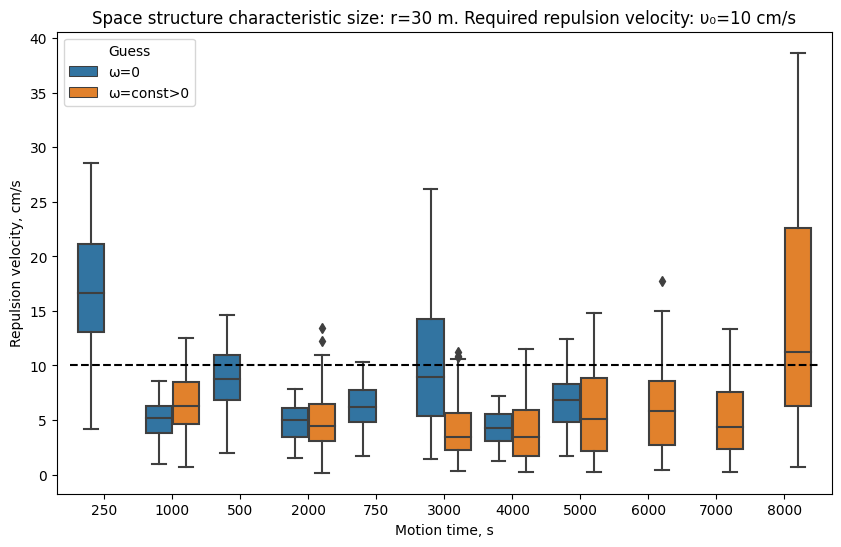

In [129]:
reference = 10
draw_them_all_right_here(r_spread, reference)

### <span style="color:#00FFFF">Исследование выполнимости задачи</span> 

##### <span style="color:#7ff388">Плоско-параллельный</span> случай

In [27]:
v0_x_approx = (a2 * a6 - a3 * a5 + a5 * sqrt(2 * c1 ** 2 + 2 * c2 ** 2)) / (a1 * a5 - a2 * a4)
v0_z_approx = (a3 * a4 - a1 * a6 + a4 * sqrt(2 * c1 ** 2 + 2 * c2 ** 2)) / (a1 * a5 - a2 * a4)
v0_x_fluminus = v0_x_approx.subs([[a1, a1symb], [a2, a2symb], [a3, a3symb], [a4, a4symb], [a5, a5symb], [a6, a6symb], 
                                  [b1, b1symb], [b2, b2symb], [b3, b3symb], [c1, c1symb], [c2, c2symb]])
v0_z_fluminus = v0_z_approx.subs([[a1, a1symb], [a2, a2symb], [a3, a3symb], [a4, a4symb], [a5, a5symb], [a6, a6symb], 
                                  [b1, b1symb], [b2, b2symb], [b3, b3symb], [c1, c1symb], [c2, c2symb]])
v0_x_max, v0_z_max = var('v0_x_max v0_z_max', real=True, constant=True)
anw_x = (v0_x_fluminus <= v0_x_max).simplify()
anw_x

v0_x_max >= M*(2*R_x_0*w_0*sin(phi_0) - R_x_0*w_0*sin(phi_0 - t*w_0)/2 - 3*R_x_0*w_0*sin(phi_0 + t*w_0)/2 - 3*R_z_0*t*w_0**2*sin(phi_0 - t*w_0)/2 + 9*R_z_0*t*w_0**2*sin(phi_0 + t*w_0)/2 - 14*R_z_0*w_0*cos(phi_0) + 5*R_z_0*w_0*cos(phi_0 - t*w_0) + 9*R_z_0*w_0*cos(phi_0 + t*w_0) - 3*Vp_z*t*w_0*cos(phi_0 - t*w_0) + 3*Vp_z*t*w_0*cos(phi_0 + t*w_0) + 16*Vp_z*sin(phi_0) - 8*Vp_z*sin(phi_0 - t*w_0) - 8*Vp_z*sin(phi_0 + t*w_0) - 2*r_x_0*w_0*sin(phi_0) + r_x_0*w_0*sin(phi_0 - t*w_0)/2 + 3*r_x_0*w_0*sin(phi_0 + t*w_0)/2 + 3*r_z_0*t*w_0**2*sin(phi_0 - t*w_0)/2 - 9*r_z_0*t*w_0**2*sin(phi_0 + t*w_0)/2 + 14*r_z_0*w_0*cos(phi_0) - 5*r_z_0*w_0*cos(phi_0 - t*w_0) - 9*r_z_0*w_0*cos(phi_0 + t*w_0) + 3*t*w_0*wp_y*x_c*cos(2*phi_0 - t*w_0)/2 - 3*t*w_0*wp_y*x_c*cos(2*phi_0 + t*w_0)/2 - 3*t*w_0*wp_y*xp_c*cos(2*phi_0 - t*w_0)/2 + 3*t*w_0*wp_y*xp_c*cos(2*phi_0 + t*w_0)/2 - 3*t*w_0*wp_y*z_0*sin(t*w_0) - 3*t*w_0*wp_y*z_c*sin(2*phi_0 - t*w_0)/2 + 3*t*w_0*wp_y*z_c*sin(2*phi_0 + t*w_0)/2 + 3*t*w_0*wp_y*zp_c*sin(t*w_

In [28]:
anw_z = (v0_z_fluminus <= v0_z_max).simplify()
anw_z

v0_z_max >= M*(sqrt(2)*w_0*sqrt(r1_x**2 + r1_z**2)*(4*cos(phi_0) - cos(phi_0 - t*w_0) - 3*cos(phi_0 + t*w_0))/2 - (4*cos(phi_0) - cos(phi_0 - t*w_0) - 3*cos(phi_0 + t*w_0))*(R_x_0*w_0 - 6*R_z_0*t*w_0**2 + 6*R_z_0*w_0*sin(t*w_0) - 4*Vp_z*cos(t*w_0) + 4*Vp_z - r_x_0*w_0 + 6*r_z_0*t*w_0**2 - 6*r_z_0*w_0*sin(t*w_0) + 3*t*w_0*wp_y*x_0*sin(phi_0) - 3*t*w_0*wp_y*x_c*sin(phi_0) + 3*t*w_0*wp_y*z_0*cos(phi_0) - 3*t*w_0*wp_y*z_c*cos(phi_0) - 4*wp_y*x_0*sin(phi_0)*sin(t*w_0) + 2*wp_y*x_0*cos(phi_0)*cos(t*w_0) - 2*wp_y*x_0*cos(phi_0) + 4*wp_y*x_c*sin(phi_0)*sin(t*w_0) + 2*wp_y*x_c*cos(phi_0)*cos(t*w_0) - 2*wp_y*x_c*cos(phi_0) - 4*wp_y*xp_c*cos(phi_0)*cos(t*w_0) + 4*wp_y*xp_c*cos(phi_0) - 2*wp_y*z_0*sin(phi_0)*cos(t*w_0) + 2*wp_y*z_0*sin(phi_0) - 4*wp_y*z_0*sin(t*w_0)*cos(phi_0) - 2*wp_y*z_c*sin(phi_0)*cos(t*w_0) + 2*wp_y*z_c*sin(phi_0) + 4*wp_y*z_c*sin(t*w_0)*cos(phi_0) + 4*wp_y*zp_c*sin(phi_0)*cos(t*w_0) - 4*wp_y*zp_c*sin(phi_0))/2 + (3*t*w_0*cos(phi_0) + 2*sin(phi_0) + sin(phi_0 - t*w_0) - 3*sin(

In [7]:
den_symb = (a1 * a5 - a2 * a4).subs([[a1, a1symb], [a2, a2symb], [a3, a3symb], [a4, a4symb], [a5, a5symb], [a6, a6symb], 
                                     [b1, b1symb], [b2, b2symb], [b3, b3symb], [c1, c1symb], [c2, c2symb]])
den_symb = den_symb.simplify()
den_symb

(M + m)**2*(3*t*w_0*sin(t*w_0) + 8*cos(t*w_0) - 8)/(M**2*w_0**2)

Когда знаменатель скоростей уходит в 0?

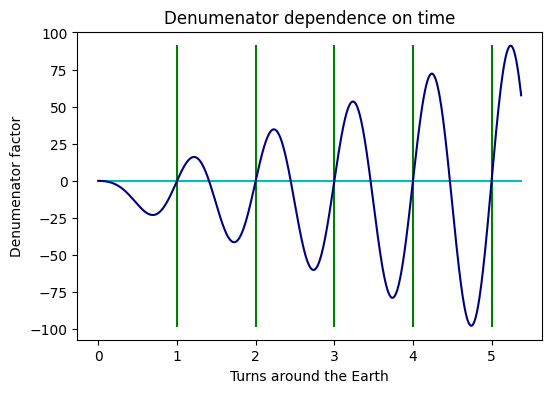

In [50]:
n_list = 1000
t_max = 3e4
t_list = np.linspace(0, t_max, n_list)
time_of_circle = 2 * np.pi / w_hkw
den_list = [3*i*w_hkw*np.sin(i*w_hkw) + 8*np.cos(i*w_hkw)-8 for i in t_list]

plt.figure(figsize=(6,4))
plt.plot(t_list / time_of_circle, [0 for _ in range(n_list)], c='c')
for i in range(int(t_max // time_of_circle)):
    plt.plot([(i + 1) for _ in range(2)], [np.min(den_list), np.max(den_list)], c='g')
plt.plot(t_list / time_of_circle, den_list, c='navy')
plt.title(f"Denumenator dependence on time")
plt.xlabel(f"Orbital periods")
plt.ylabel(f"Denumenator factor")
plt.show()

##### <span style="color:#7ff388">Статический</span> случай

In [ ]:
def get_v0(r0, r1, t):
    w = w_hkw
    x0, y0, z0 = r0
    x1, y1, z1 = r1
    den = -3 * t * w * np.sin(t * w) - 8 * np.cos(t * w) + 8
    num1 = w * (6 * t * w * z0 * np.sin(t * w) - x0 * np.sin(t * w) + x1 * np.sin(t * w) + 14 * z0 * np.cos(t * w) -
                14 * z0 - 2 * z1 * np.cos(t * w) + 2 * z1)
    num2 = w * (3 * t * w * z0 * np.cos(t * w) - 3 * t * w * z1 - 2 * x0 * np.cos(t * w) + 2 * x0 +
                2 * x1 * np.cos(t * w) - 2 * x1 - 4 * z0 * np.sin(t * w) + 4 * z1 * np.sin(t * w))
    return np.array([num1 / den,
                     w * (-y0 * np.cos(t * w) + y1)/np.sin(t * w),
                     num2 / den])

In [132]:
w, t = var('w t', real=True)
den = -3 * t * w * sin(t * w) - 8 * cos(t * w) + 8
den

-3*t*w*sin(t*w) - 8*cos(t*w) + 8

##### <span style="color:#e9f87f">Тот же</span> знаменатель!